# Cognifyz level 3 Task 3 Data Visualization




In [1]:
## Importing the required libraries

from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
##Downloading the dataset and converting it into data frame

df = pd.read_csv ('/content/drive/MyDrive/data/Dataset .csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.shape

(9551, 21)

In [5]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
null_values = df.isnull().sum() #check for null values in each column
print(null_values)

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


#Cleaning the table and make sure there is no Null Values

In [7]:
df=df.dropna()

null_values = df.isnull().sum() #check for null values in each column
print(null_values)

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


#Visually Representing the Relation between the Cusine type and rating

<ipython-input-9-7f4fdccd1f84>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_rating_by_cuisine, x='Aggregate rating', y='Cuisines', palette='magma')


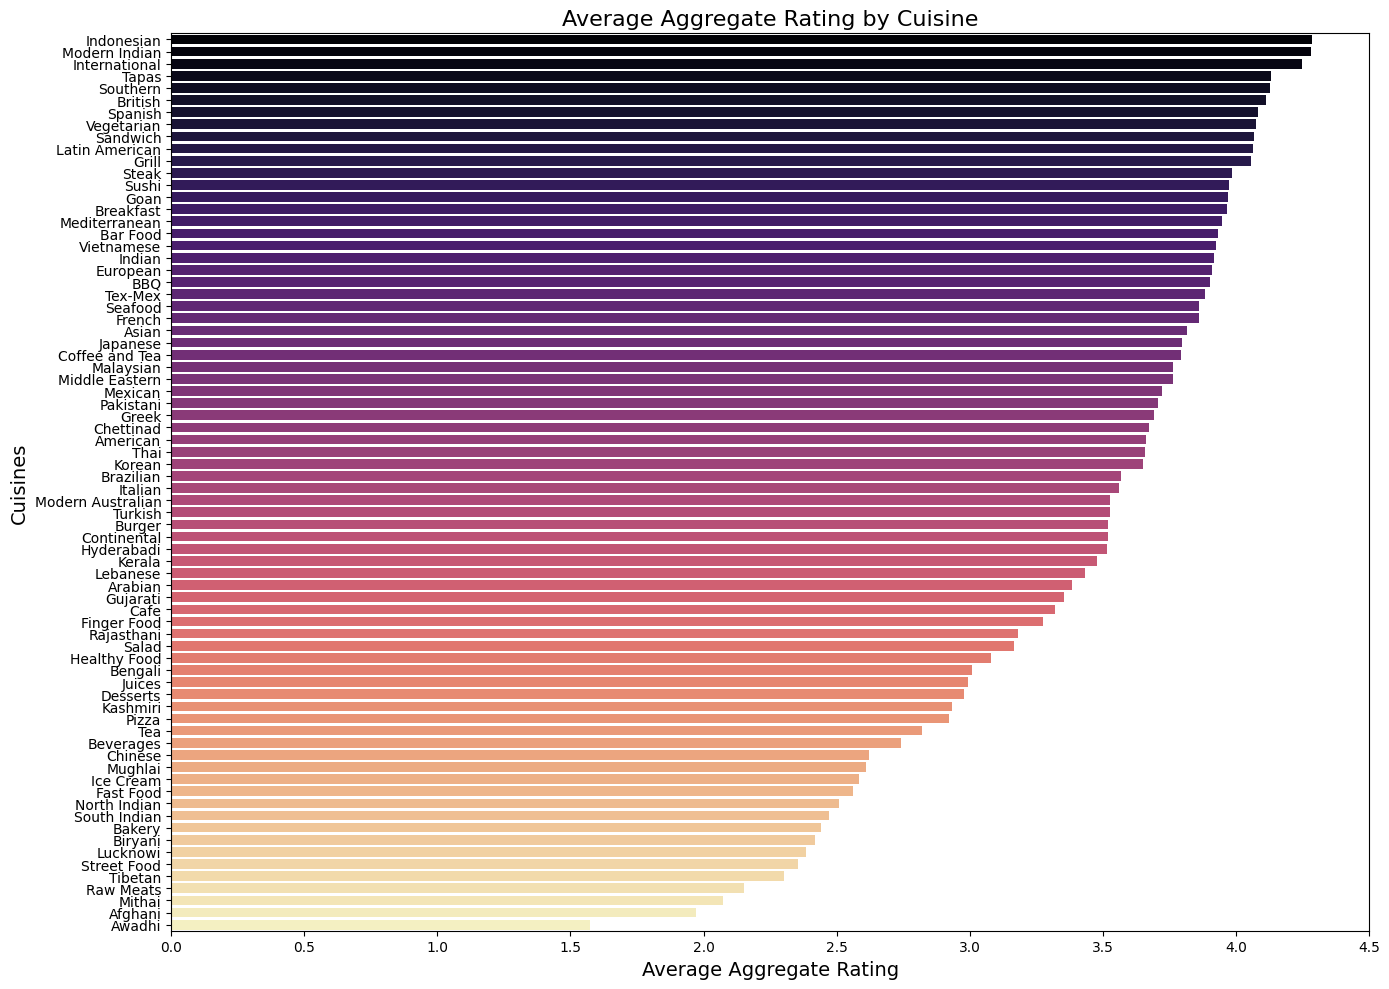

In [9]:
# Splitting the 'Cuisines' column into multiple rows
df_cuisines = df.assign(Cuisines=df['Cuisines'].str.split(', ')).explode('Cuisines')

# Group by cuisine and calculate the average rating
average_rating_by_cuisine = df_cuisines.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).reset_index()

# Filter to include only cuisines with a significant number of reviews (for better visualization)
cuisine_counts = df_cuisines['Cuisines'].value_counts()
significant_cuisines = cuisine_counts[cuisine_counts > 10].index  # Example threshold
average_rating_by_cuisine = average_rating_by_cuisine[average_rating_by_cuisine['Cuisines'].isin(significant_cuisines)]

# Set the figure size
plt.figure(figsize=(14, 10))

# Create the bar plot
sns.barplot(data=average_rating_by_cuisine, x='Aggregate rating', y='Cuisines', palette='magma')

# Add labels and title
plt.xlabel('Average Aggregate Rating', fontsize=14)
plt.ylabel('Cuisines', fontsize=14)
plt.title('Average Aggregate Rating by Cuisine', fontsize=16)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


From the above we can clearly see that Indonesian Food has secured the highest Rating and Awadhi has secured the least

<ipython-input-10-9e7810faf98e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=average_rating_by_cuisine, x='Aggregate rating', y='Cuisines', palette='magma')


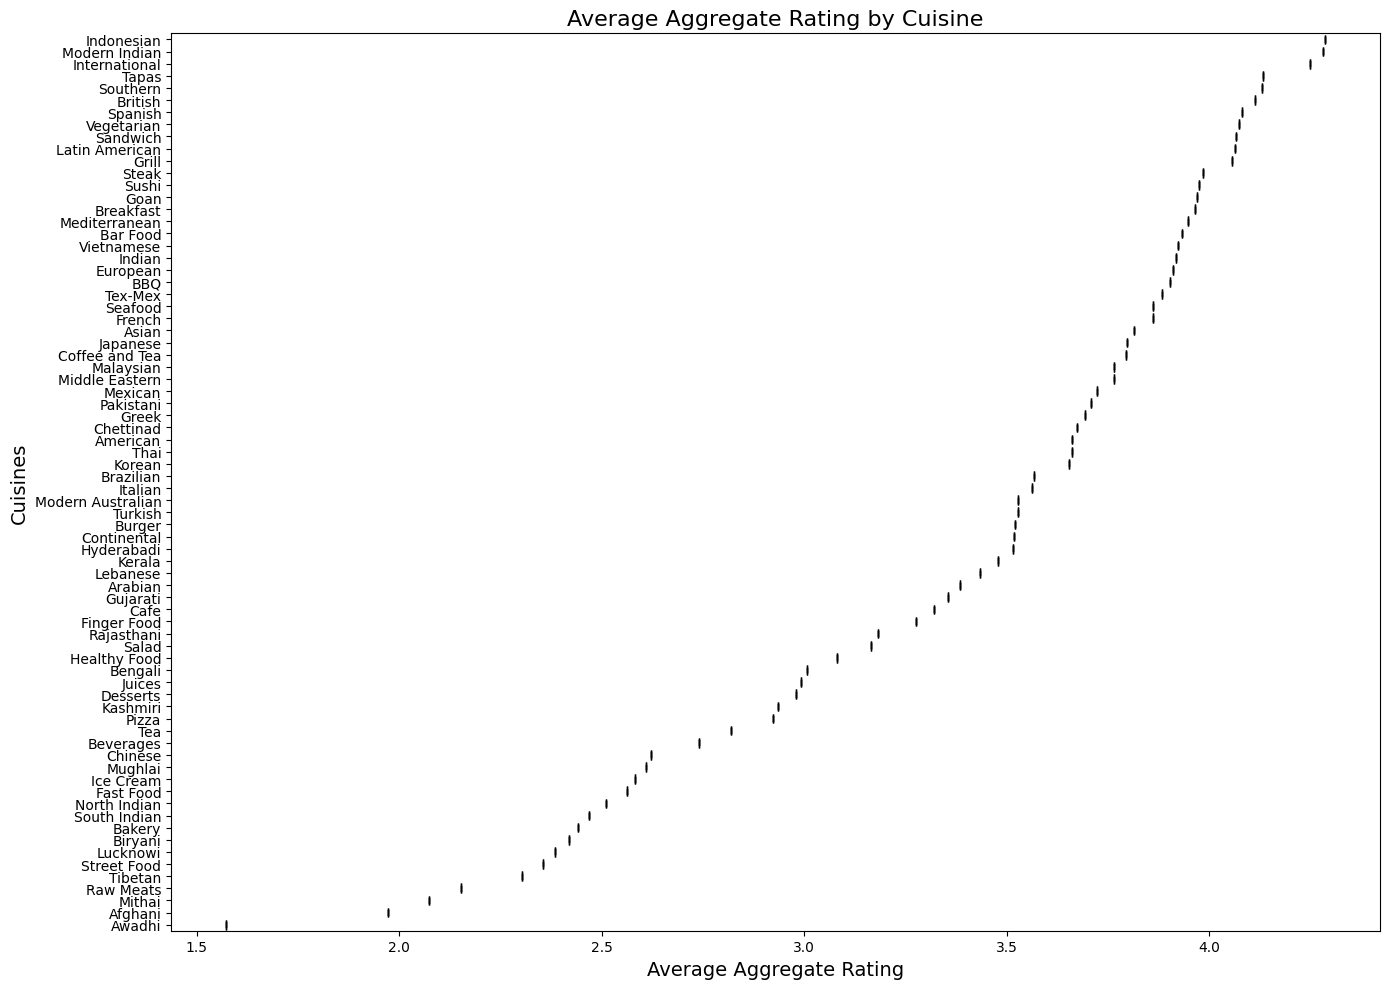

In [10]:
# Splitting the 'Cuisines' column into multiple rows
df_cuisines = df.assign(Cuisines=df['Cuisines'].str.split(', ')).explode('Cuisines')

# Group by cuisine and calculate the average rating
average_rating_by_cuisine = df_cuisines.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).reset_index()

# Filter to include only cuisines with a significant number of reviews (for better visualization)
cuisine_counts = df_cuisines['Cuisines'].value_counts()
significant_cuisines = cuisine_counts[cuisine_counts > 10].index  # Example threshold
average_rating_by_cuisine = average_rating_by_cuisine[average_rating_by_cuisine['Cuisines'].isin(significant_cuisines)]

# Set the figure size
plt.figure(figsize=(14, 10))

# Create the bar plot
sns.boxplot(data=average_rating_by_cuisine, x='Aggregate rating', y='Cuisines', palette='magma')

# Add labels and title
plt.xlabel('Average Aggregate Rating', fontsize=14)
plt.ylabel('Cuisines', fontsize=14)
plt.title('Average Aggregate Rating by Cuisine', fontsize=16)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


#Representing Using Box Plot

<ipython-input-11-cc6769c81a1f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['Cuisines'].isin(significant_cuisines)], x='Aggregate rating', y='Cuisines', palette='viridis')


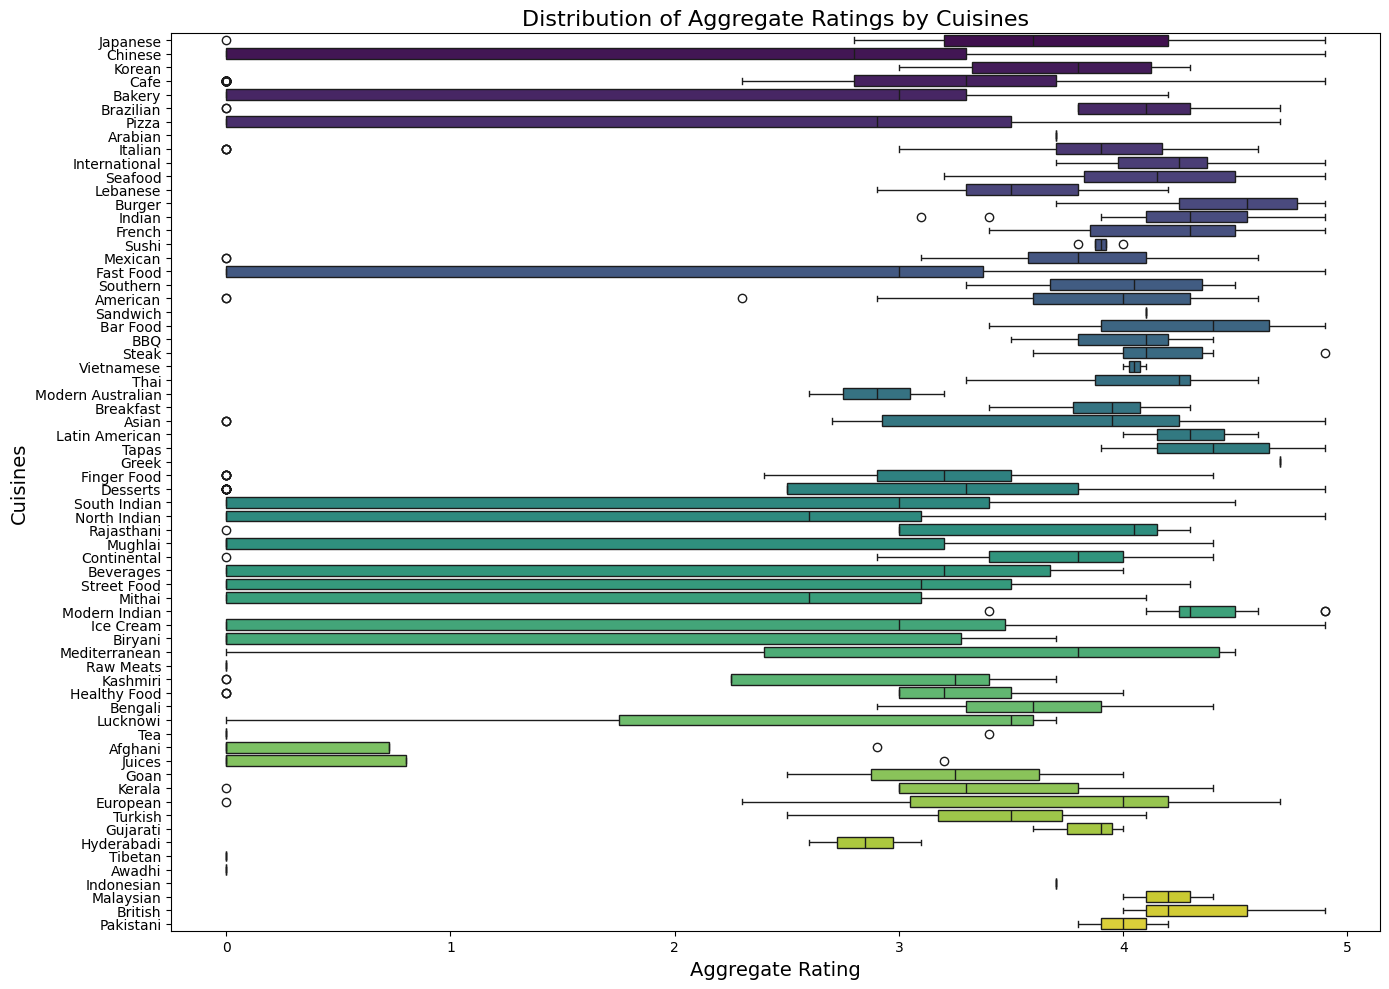

In [11]:
# Set the figure size
plt.figure(figsize=(14, 10))

# Create the box plot
sns.boxplot(data=df[df['Cuisines'].isin(significant_cuisines)], x='Aggregate rating', y='Cuisines', palette='viridis')

# Add labels and title
plt.xlabel('Aggregate Rating', fontsize=14)
plt.ylabel('Cuisines', fontsize=14)
plt.title('Distribution of Aggregate Ratings by Cuisines', fontsize=16)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()



We can clealry see most of items had got a mixed rating based upon the restarent

#Visually Representing the Relation between the City  and rating

<ipython-input-12-92e86eccf44c>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_rating_by_city, x='Aggregate rating', y='City', palette='viridis')


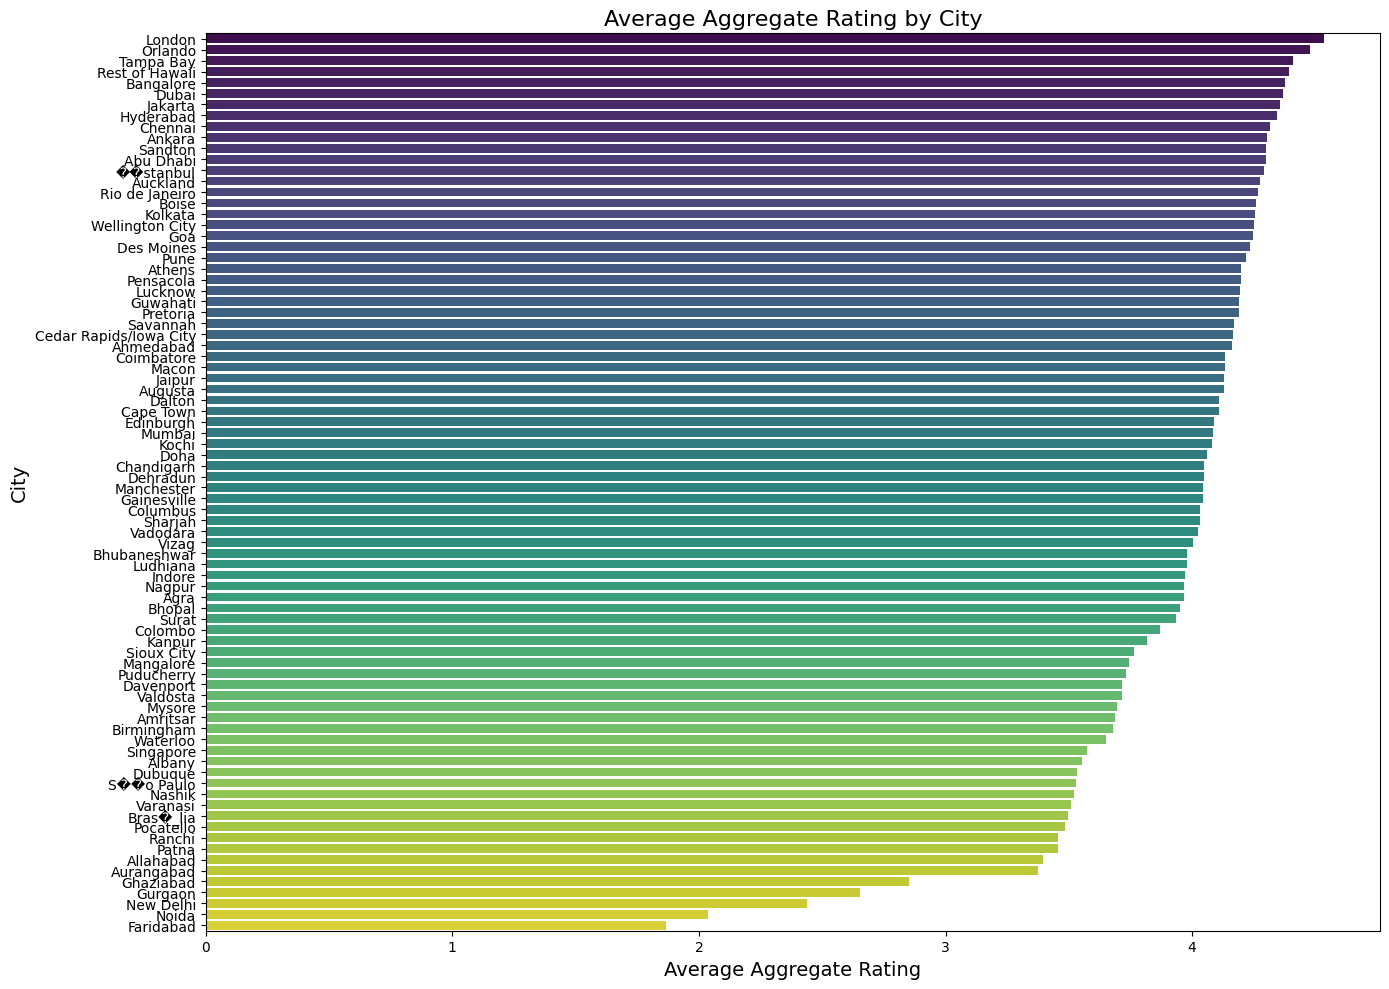

In [12]:

# Group by city and calculate the average rating
average_rating_by_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).reset_index()

# Filter to include only cities with a significant number of reviews (for better visualization)
city_counts = df['City'].value_counts()
significant_cities = city_counts[city_counts > 10].index  # Example threshold
average_rating_by_city = average_rating_by_city[average_rating_by_city['City'].isin(significant_cities)]

# Set the figure size
plt.figure(figsize=(14, 10))

# Create the bar plot
sns.barplot(data=average_rating_by_city, x='Aggregate rating', y='City', palette='viridis')

# Add labels and title
plt.xlabel('Average Aggregate Rating', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.title('Average Aggregate Rating by City', fontsize=16)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


From the above we can clearly see that London city has got the highest rating and Faridabad had got the lowest rating



<ipython-input-13-730f6115ccb9>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=average_rating_by_city, x='Aggregate rating', y='City', palette='viridis')


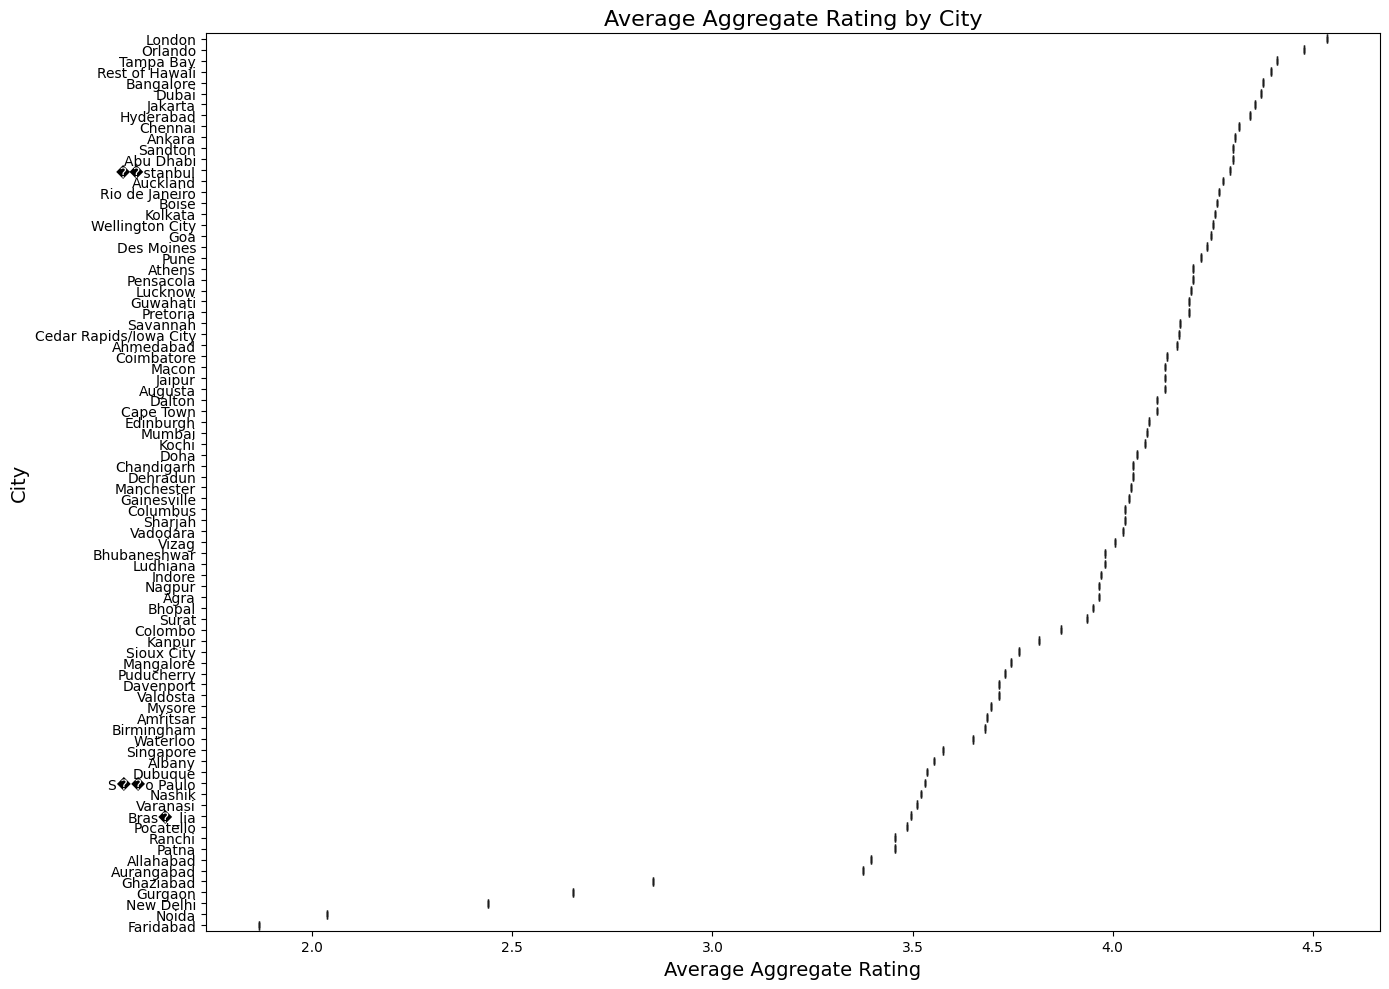

In [13]:

# Group by city and calculate the average rating
average_rating_by_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).reset_index()

# Filter to include only cities with a significant number of reviews (for better visualization)
city_counts = df['City'].value_counts()
significant_cities = city_counts[city_counts > 10].index  # Example threshold
average_rating_by_city = average_rating_by_city[average_rating_by_city['City'].isin(significant_cities)]

# Set the figure size
plt.figure(figsize=(14, 10))

# Create the bar plot
sns.boxplot(data=average_rating_by_city, x='Aggregate rating', y='City', palette='viridis')

# Add labels and title
plt.xlabel('Average Aggregate Rating', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.title('Average Aggregate Rating by City', fontsize=16)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


#Visualizing Using a heat map




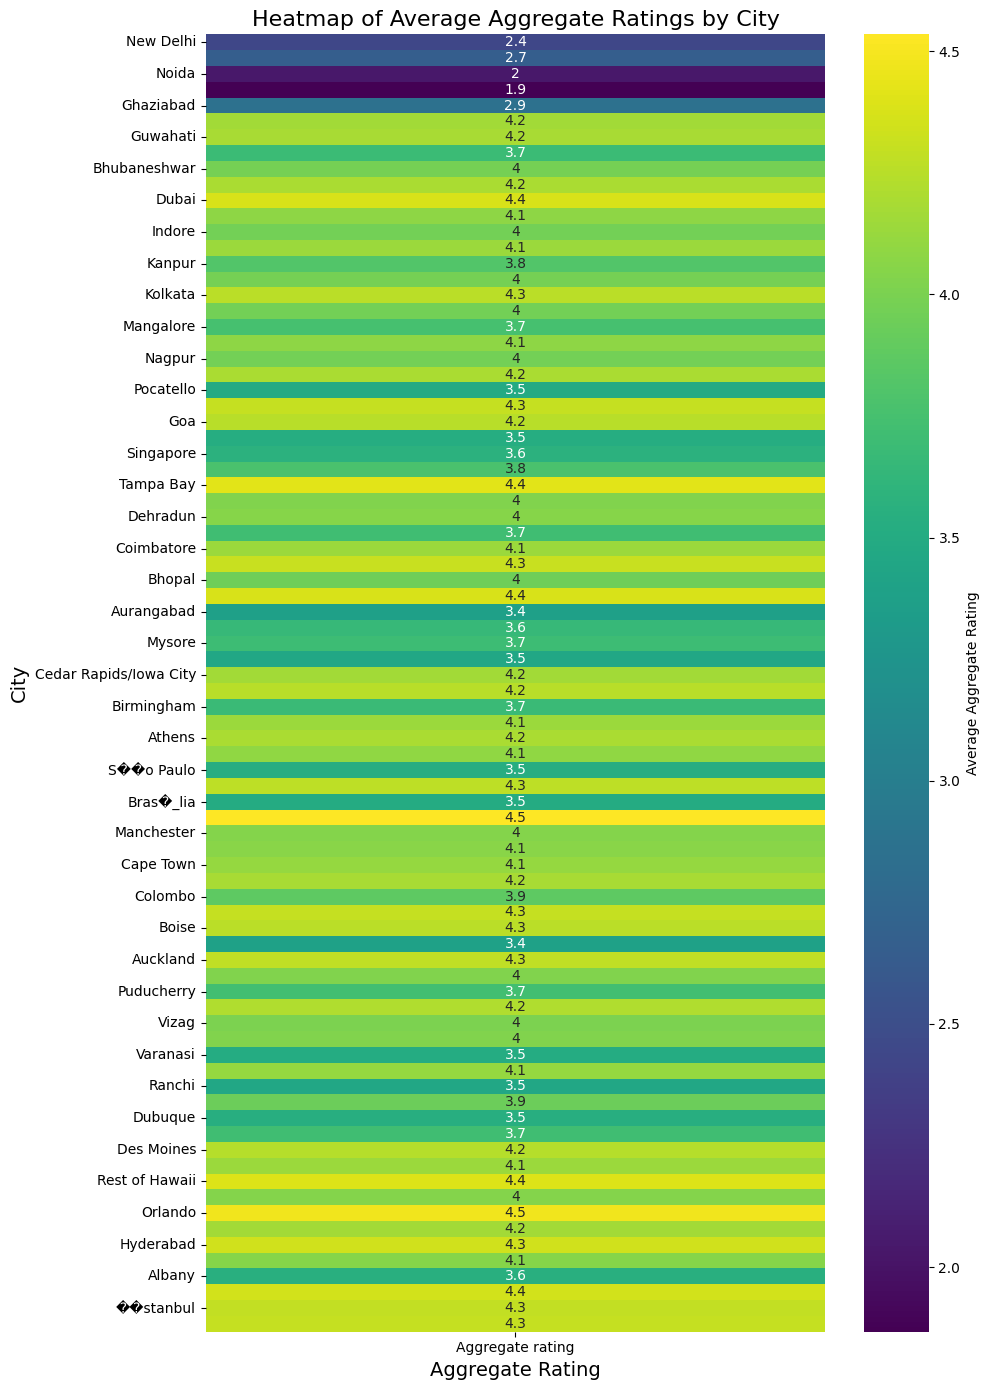

In [14]:
# Pivot the data for heatmap
heatmap_data = df.pivot_table(values='Aggregate rating', index='City', aggfunc='mean')

# Filter to include only significant cities
heatmap_data = heatmap_data.loc[significant_cities]

# Set the figure size
plt.figure(figsize=(10, 14))

# Create the heatmap
sns.heatmap(heatmap_data, annot=True, cmap='viridis', cbar_kws={'label': 'Average Aggregate Rating'})

# Add labels and title
plt.xlabel('Aggregate Rating', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.title('Heatmap of Average Aggregate Ratings by City', fontsize=16)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-15-a478c610e4fb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['City'].isin(significant_cities)], x='Aggregate rating', y='City', palette='viridis')


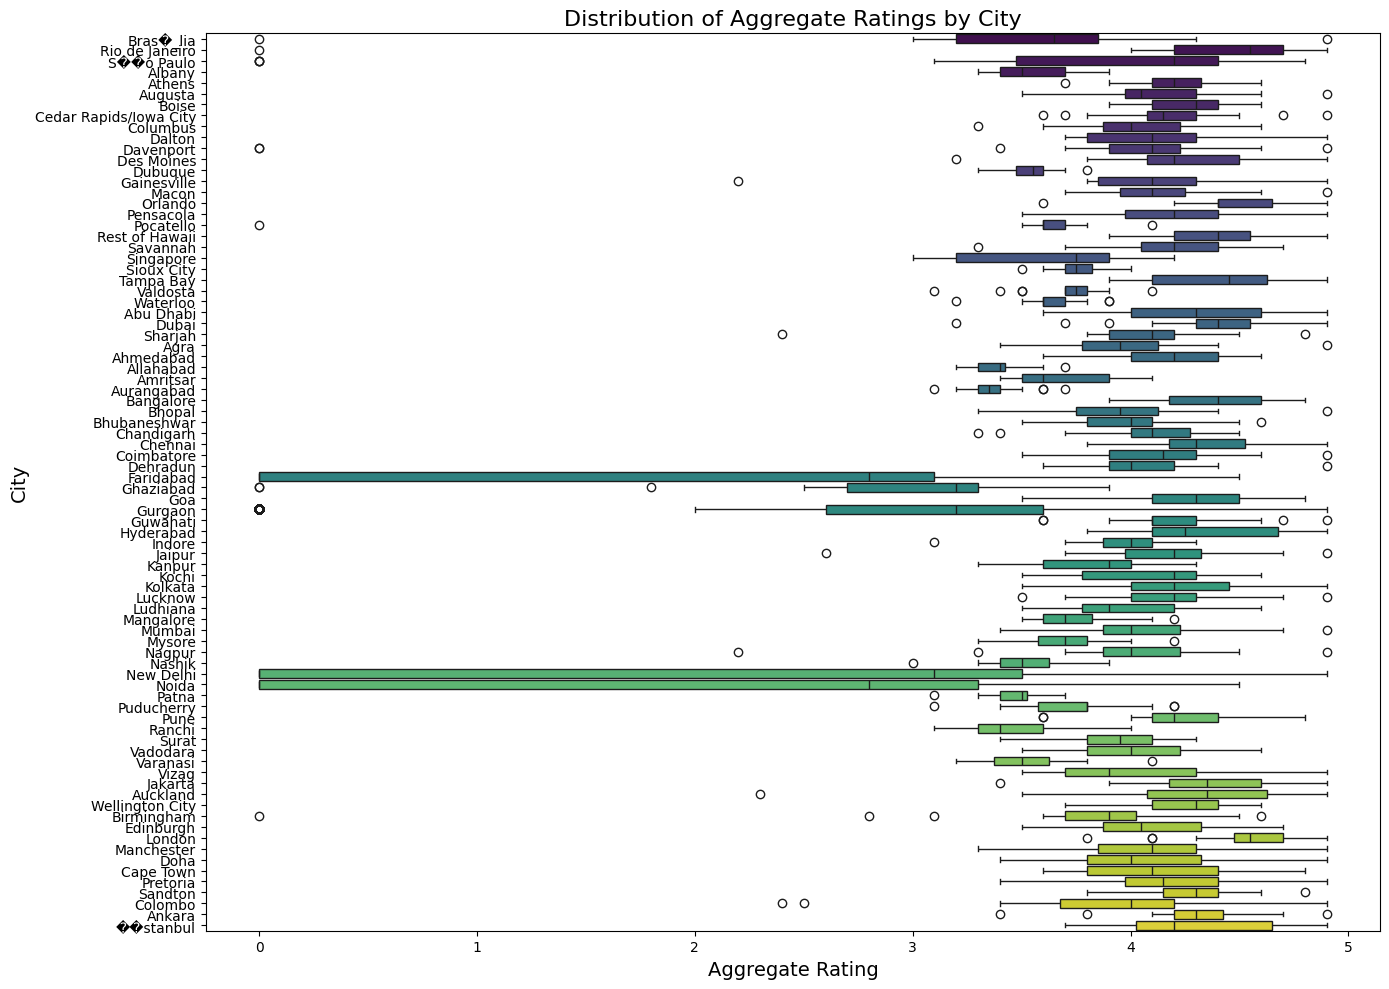

In [15]:
# Set the figure size
plt.figure(figsize=(14, 10))

# Create the box plot
sns.boxplot(data=df[df['City'].isin(significant_cities)], x='Aggregate rating', y='City', palette='viridis')

# Add labels and title
plt.xlabel('Aggregate Rating', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.title('Distribution of Aggregate Ratings by City', fontsize=16)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


Using the box plot we can see that Faridabad,New Delhi and Noida has got the mixed review from 0-3.5 Aggregate Ratings
